In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [4]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Visualize the dataset

Target labels:  [5 4 4 7 1 1 5 7 6 8]


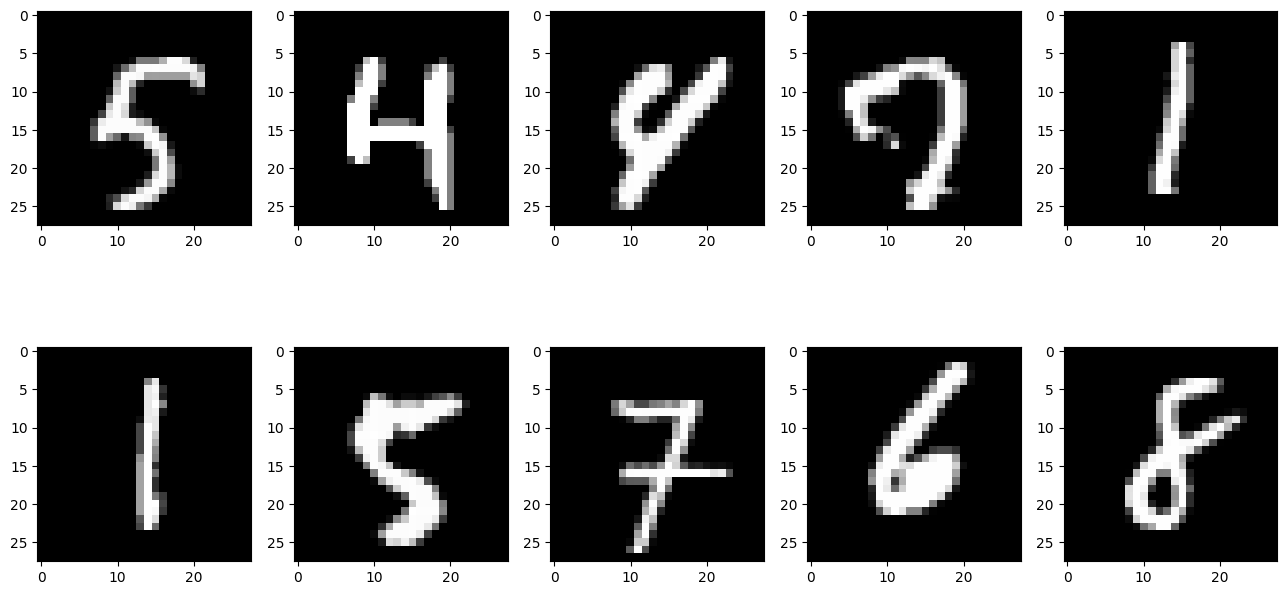

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [6]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [19]:
from tensorflow.keras.regularizers import l1, l2
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(64,input_dim=64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(32,input_dim=64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [22]:
# train_info = model.fit(new_train_data , new_train_target , epochs = 10)
train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7630 - loss: 0.9466
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9462 - loss: 0.3368
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9584 - loss: 0.2824
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9651 - loss: 0.2540
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9684 - loss: 0.2347
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9703 - loss: 0.2215
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9734 - loss: 0.2075
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9734 - loss: 0.2005
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9765 - loss: 0.1891
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9754 - loss: 0.1859
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9776 - loss: 0.1788
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━

Plot the loss and accuracy graphs

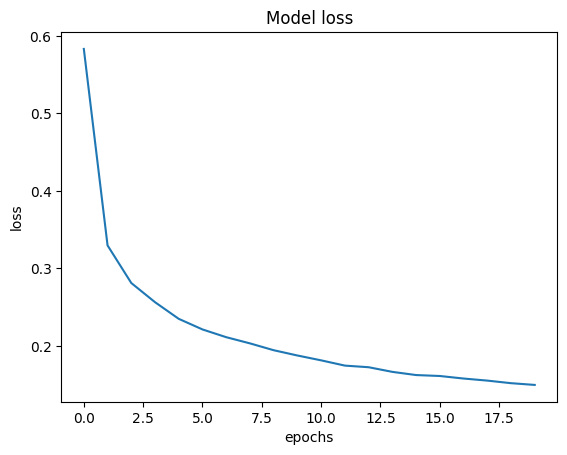

In [23]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

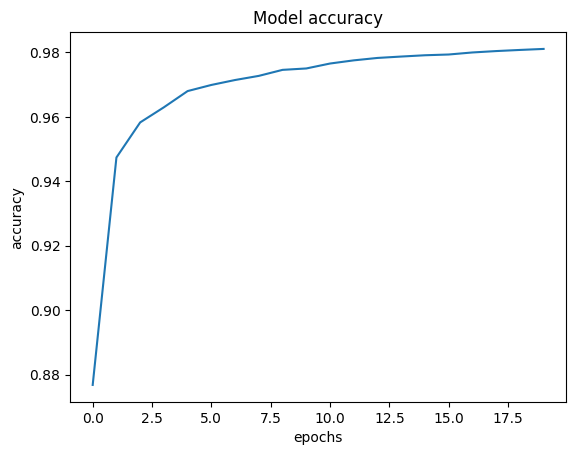

In [24]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [25]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9737 - loss: 0.1730
Loss of the Test dataset is: 0.15827755630016327
Accuracy of the test dataset is: 0.9769999980926514


Save the model weights

In [26]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


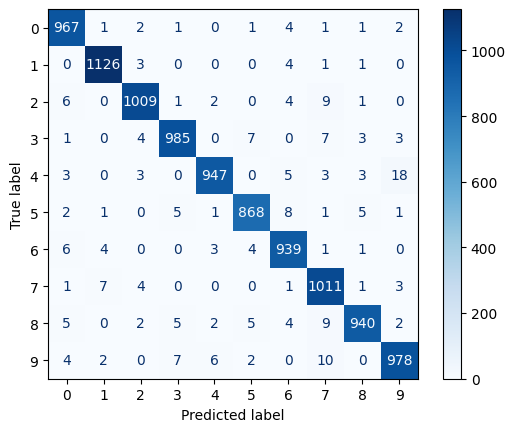

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
test_predictions = model.predict(new_test_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(new_test_target, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_true_classes, test_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()